In [143]:
# Import dependancies
import tweepy
import re
import requests
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import ast
import community
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from itertools import count
from tqdm import tqdm
from fa2 import ForceAtlas2

In [144]:
# Load data
usernames_can = pd.read_csv("data/canada/files/data_w_usernames_CAN.csv",index_col=0, dtype={'user_id':str})

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [145]:
usernames_can = usernames_can.reset_index(drop = True)

In [146]:
mentions_can = pd.read_csv("data/canada/files/mentions_CAN.csv", index_col = 0)
mentions_can = mentions_can.reset_index(drop=True)

In [147]:
mentions_can['username'] = pd.merge(mentions_can, usernames_can, on = "tweet_ID").iloc[:, -1] 

In [148]:
data_df_can = mentions_can

In [149]:
data_df_can = data_df_can.dropna(subset=['username']).reset_index(drop=True)

In [150]:
data_df_can['mentions'] = data_df_can['mentions'].apply(ast.literal_eval)

In [151]:
data_df_can['country'] = ['can']*len(data_df_can)

In [152]:
data_df_can.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.221960e+18,13752142,wuhan,2020-01-28 00:55:15,0.409,0.468,0.530,0.255,0.462,-1.0,A,@maurerbot @JustinTrudeau There's already What...,28.0,"[maurerbot, JustinTrudeau]",StMinaHamilton,can
1,1.221971e+18,1031691314536935424,wuhan,2020-01-28 01:38:26,0.501,0.473,0.366,0.294,0.367,0.0,NaN,"""Tracking coronavirus: Map, data and timeline""...",16.0,[BNONews],WalkinRobinL,can
2,1.221976e+18,31473811,wuhan,2020-01-28 01:57:58,0.451,0.453,0.435,0.336,0.451,-1.0,F,@AliEhsassi we have a Canadian baby and her mo...,34.0,[AliEhsassi],WillWalkerley,can
3,1.221985e+18,1072771,wuhan,2020-01-28 02:36:25,0.436,0.526,0.415,0.232,0.379,-1.0,F,3 are currently under observation in Quebec fo...,38.0,[GoogleNews],Road_Buster84,can
4,1.221990e+18,401098282,wuhan,2020-01-28 02:53:08,0.501,0.436,0.473,0.351,0.365,0.0,NaN,@Franktmcveety Is this the official site for h...,40.0,[Franktmcveety],burlingtonlaw,can


In [153]:
data_df_can.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
229545,1.285773e+18,2876869331,covid,2020-07-22 03:07:43,0.504,0.379,0.431,0.378,0.372,0.0,NaN,@AmberWe55604849 @DanielScott128 @prf5 @alb309...,21.0,"[AmberWe55604849, DanielScott128, prf5, alb309...",VANTEC_Networks,can
229546,1.285774e+18,1701955734,covid,2020-07-22 03:08:18,0.386,0.401,0.572,0.282,0.428,-1.0,A,@marklewismd My mom who is on chemo doesn't do...,37.0,[marklewismd],lgc1920,can
229547,1.285774e+18,16485651,covid,2020-07-22 03:08:22,0.389,0.579,0.484,0.281,0.492,-1.0,F,@jmwensley @randyhillier I had 2 phone consult...,48.0,"[jmwensley, randyhillier]",RQHRVolunteer,can
229548,1.285774e+18,954879392,covid,2020-07-22 03:10:27,0.668,0.335,0.319,0.501,0.326,1.0,H,The Pension War Room™️ remember quote about po...,23.0,[jkenney],downtownalice,can
229549,1.285774e+18,3364963960,covid,2020-07-22 03:11:19,0.394,0.513,0.508,0.218,0.508,-1.0,F,@TylaYaweh @DaBaby Aye wouldn’t hurt since me ...,27.0,"[TylaYaweh, DaBaby]",Syncwithmoi,can


In [154]:
# Load data
usernames_uk = pd.read_csv("data/uk/files/data_w_usernames_uk.csv",index_col=0, dtype={'user_id':str})

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [155]:
usernames_uk = usernames_uk.reset_index(drop = True)

In [156]:
mentions_uk = pd.read_csv("data/uk/files/mentions_uk.csv", index_col = 0)
mentions_uk = mentions_uk.reset_index(drop=True)

In [157]:
mentions_uk['username'] = pd.merge(mentions_uk, usernames_uk, on = "tweet_ID").iloc[:, -1] 

In [158]:
data_df_uk = mentions_uk

In [159]:
data_df_uk = data_df_uk.dropna(subset=['username']).reset_index(drop=True)

In [160]:
data_df_uk['mentions'] = data_df_uk['mentions'].apply(ast.literal_eval)

In [161]:
data_df_uk['country'] = ['uk']*len(data_df_uk)

In [162]:
data_df_uk.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1234294853330182144,20973388,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,[darrenadam],PatrickDoyle83,uk
1,1234305116506861568,442831126,covid,2020-03-02 02:30:46,0.665,0.326,0.373,0.443,0.325,1.0,H,@Grummz An article for you after yesterday's m...,18.0,[Grummz],BatemanStuart1,uk
2,1234310189404348417,1157949934949347328,wuhan,2020-03-02 02:50:56,0.371,0.525,0.426,0.234,0.455,-1.0,F,@fascinatorfun So question is why the mortalit...,14.0,[fascinatorfun],MUVAHOOD,uk
3,1234318241431990272,16027848,covid,2020-03-02 03:22:55,0.329,0.587,0.570,0.138,0.474,-1.0,F,Video: #ToxicTories try to hide damage to NHS ...,27.0,[skwawkbox],deadendfriends8,uk
4,1234321940401270785,282914879,covid,2020-03-02 03:37:37,0.514,0.364,0.370,0.361,0.360,0.0,NaN,"@dray24574721 @BNODesk This, from S Korea afte...",15.0,"[dray24574721, BNODesk]",hoglet3,uk


In [163]:
data_df_uk.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
269755,1285590859094863873,104942955,covid,2020-07-21 15:02:00,0.634,0.270,0.329,0.419,0.296,1.0,H,🌟 Free HR Advice 🌟\n\nInspiring People HR @Ins...,35.0,[InspiringPplHR],opus_llp,uk
269756,1285590913683722242,556875827,covid,2020-07-21 15:02:13,0.536,0.462,0.382,0.381,0.389,1.0,H,Excellent blog by @M_Winthrop - on the impacts...,32.0,[M_Winthrop],bradleyyyshea,uk
269757,1285591051756023809,102957958,covid,2020-07-21 15:02:46,0.578,0.405,0.402,0.348,0.389,1.0,H,#Wellbeing | Protecting #BAME employees from #...,36.0,[Generali_UK],JarobeHHF,uk
269758,1285591471194857474,1080551330849136641,covid,2020-07-21 15:04:26,0.399,0.414,0.458,0.275,0.485,-1.0,S,"@itslifeaslolly All but 3, due to complication...",43.0,[itslifeaslolly],YLALawyers,uk
269759,1285591579521146880,37449155,covid,2020-07-21 15:04:52,0.530,0.478,0.418,0.420,0.416,1.0,H,@SarahLouWrites0 Thanks. She’s home and restin...,24.0,[SarahLouWrites0],jennigbradshaw,uk


In [164]:
graph_df = data_df_uk.append(data_df_can)
graph_df = graph_df.reset_index(drop=True)
graph_df.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.234295e+18,20973388,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,[darrenadam],PatrickDoyle83,uk
1,1.234305e+18,442831126,covid,2020-03-02 02:30:46,0.665,0.326,0.373,0.443,0.325,1.0,H,@Grummz An article for you after yesterday's m...,18.0,[Grummz],BatemanStuart1,uk
2,1.234310e+18,1157949934949347328,wuhan,2020-03-02 02:50:56,0.371,0.525,0.426,0.234,0.455,-1.0,F,@fascinatorfun So question is why the mortalit...,14.0,[fascinatorfun],MUVAHOOD,uk
3,1.234318e+18,16027848,covid,2020-03-02 03:22:55,0.329,0.587,0.570,0.138,0.474,-1.0,F,Video: #ToxicTories try to hide damage to NHS ...,27.0,[skwawkbox],deadendfriends8,uk
4,1.234322e+18,282914879,covid,2020-03-02 03:37:37,0.514,0.364,0.370,0.361,0.360,0.0,NaN,"@dray24574721 @BNODesk This, from S Korea afte...",15.0,"[dray24574721, BNODesk]",hoglet3,uk


In [165]:
graph_df.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
499305,1.285773e+18,2876869331,covid,2020-07-22 03:07:43,0.504,0.379,0.431,0.378,0.372,0.0,NaN,@AmberWe55604849 @DanielScott128 @prf5 @alb309...,21.0,"[AmberWe55604849, DanielScott128, prf5, alb309...",VANTEC_Networks,can
499306,1.285774e+18,1701955734,covid,2020-07-22 03:08:18,0.386,0.401,0.572,0.282,0.428,-1.0,A,@marklewismd My mom who is on chemo doesn't do...,37.0,[marklewismd],lgc1920,can
499307,1.285774e+18,16485651,covid,2020-07-22 03:08:22,0.389,0.579,0.484,0.281,0.492,-1.0,F,@jmwensley @randyhillier I had 2 phone consult...,48.0,"[jmwensley, randyhillier]",RQHRVolunteer,can
499308,1.285774e+18,954879392,covid,2020-07-22 03:10:27,0.668,0.335,0.319,0.501,0.326,1.0,H,The Pension War Room™️ remember quote about po...,23.0,[jkenney],downtownalice,can
499309,1.285774e+18,3364963960,covid,2020-07-22 03:11:19,0.394,0.513,0.508,0.218,0.508,-1.0,F,@TylaYaweh @DaBaby Aye wouldn’t hurt since me ...,27.0,"[TylaYaweh, DaBaby]",Syncwithmoi,can


In [174]:
graph_df_test = graph_df.sample(frac=0.003)
graph_df_test = graph_df_test.reset_index(drop=True)

In [175]:
graph_df_test.shape

(1498, 16)

In [176]:
graph_df_test.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.250153e+18,830498424646676481,covid,2020-04-14 20:05:04,0.371,0.500,0.539,0.204,0.436,-1.0,A,Wondering what’s going on with DriverCheck in ...,36.0,[DriverCheckCA],mimzchitambo,can
1,1.240731e+18,18514918,covid,2020-03-19 20:06:15,0.505,0.380,0.404,0.349,0.326,0.0,NaN,"14,000 Greater Vancouver-area realtors advised...",25.0,"[adamchahl, Hutchyman, mtnbvan, rohanarezel, R...",EverAfterFest,can
2,1.278727e+18,35378960,covid,2020-07-02 16:29:18,0.551,0.470,0.443,0.464,0.415,1.0,H,Surreal trip to my local GP surgery @GPManorHo...,29.0,[GPManorHouse],Gospelini,uk
3,1.243605e+18,14258131,covid,2020-03-27 18:25:32,0.546,0.336,0.367,0.308,0.377,1.0,H,COVID-19: PM Justin Trudeau announces measures...,23.0,[YouTube],heyitskoo,can
4,1.241554e+18,1130986578195693569,corona,2020-03-22 02:36:33,0.504,0.500,0.436,0.350,0.407,0.0,NaN,Emirates flights from the UAE to Newzealand wi...,41.0,"[SomPundit, ashqaraar03]",Peer_Guidance,can


In [177]:
graph_df_test.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
1493,1.284554e+18,43776416,covid,2020-07-18 18:21:24,0.336,0.444,0.483,0.214,0.476,-1.0,A,@IPsnippet @LukeSorbaLabour @cllrmillbank @Sop...,55.0,"[IPsnippet, LukeSorbaLabour, cllrmillbank, Sop...",TantivyUK,uk
1494,1.271621e+18,466812378,covid,2020-06-13 01:51:13,0.402,0.464,0.448,0.226,0.460,-1.0,F,@patrickbrownont Emerging data on link betwn l...,55.0,[patrickbrownont],LES__89,can
1495,1.248250e+18,52200365,covid,2020-04-09 14:02:45,0.520,0.476,0.459,0.479,0.491,0.0,NaN,I AM CRUSHED! .... but my bank account and mak...,21.0,[CourtneyRaeFM],bree_shanelle,can
1496,1.241677e+18,2996872697,covid,2020-03-22 10:45:44,0.426,0.540,0.506,0.251,0.479,-1.0,F,"@joseph_hoar @ShropshireMan Really, I take it ...",37.0,"[joseph_hoar, ShropshireMan]",ChrisHo42906232,uk
1497,1.267509e+18,16034244,covid,2020-06-01 17:30:00,0.406,0.529,0.521,0.195,0.499,-1.0,F,Likening 'Karen' memes to racial slurs 'trivia...,16.0,[cbcradio],boonebytes,can


In [178]:
dict_edges = dict(zip(graph_df_test['username'], graph_df_test['mentions']))

In [191]:
G = nx.DiGraph(dict_edges)

In [192]:
len(G.edges)

2582

In [193]:
print(len(G.nodes))

3666


In [194]:
empty_dict = dict.fromkeys(range(0, len(graph_df_test)))
for i in tqdm(range(len(G.nodes))):
    try:
        j = np.where(graph_df_test["username"] == list(G.nodes)[i])[0][0]
        empty_dict[i] = {'country':list(graph_df_test['country'])[j]}
        
    except IndexError:
        empty_dict[i] = {'country':"unk"}

100%|██████████| 3666/3666 [00:01<00:00, 3210.65it/s]


In [195]:
empty_dict = dict(zip(list(G.nodes),list(empty_dict.values()))) 

In [196]:
nx.set_node_attributes(G, empty_dict)

In [197]:
# Extract largest component
gcc = max(nx.weakly_connected_components(G), key=len)
gcc_subgraph = G.subgraph(gcc)
gcc_subgraph = gcc_subgraph.to_undirected()
g = G.to_undirected()

In [186]:
# Get in-degrees in dict
degree_dict = dict(g.degree)

## Node color map ##
color_map_nodes = []

for node in tqdm(list(g.nodes())):
    
    if nx.get_node_attributes(g,'country')[node] == 'can':
        color_map_nodes.append("#DC143C")
        
    elif nx.get_node_attributes(g,'country')[node] == 'uk': # UK
        color_map_nodes.append("#4169E1")
    else:
        color_map_nodes.append("lightslategray")

## Edge color map ##
color_map_edge = []

# For UK-UK, CAN-CAN, UK-CAN, outside dataset respectively
color_a,color_b,color_c, color_d = '#87CEFA', '#FFB6C1'  ,'black', "gold"

for i in tqdm(list(g.edges())):
    
    if nx.get_node_attributes(g, 'country')[i[0]] != nx.get_node_attributes(g, 'country')[i[1]]:
        color_map_edge.append(color_c)
        
    elif nx.get_node_attributes(g, 'country')[i[0]] == 'uk':
        color_map_edge.append(color_a)
    
    elif nx.get_node_attributes(g, 'country')[i[0]] == 'can':
        color_map_edge.append(color_b)
        
    else:
        color_map_edge.append(color_d)

100%|██████████| 2582/2582 [00:07<00:00, 357.98it/s]


100%|██████████| 2000/2000 [01:12<00:00, 27.53it/s]


BarnesHut Approximation  took  32.37  seconds
Repulsion forces  took  36.48  seconds
Gravitational forces  took  0.35  seconds
Attraction forces  took  0.07  seconds
AdjustSpeedAndApplyForces step  took  1.56  seconds


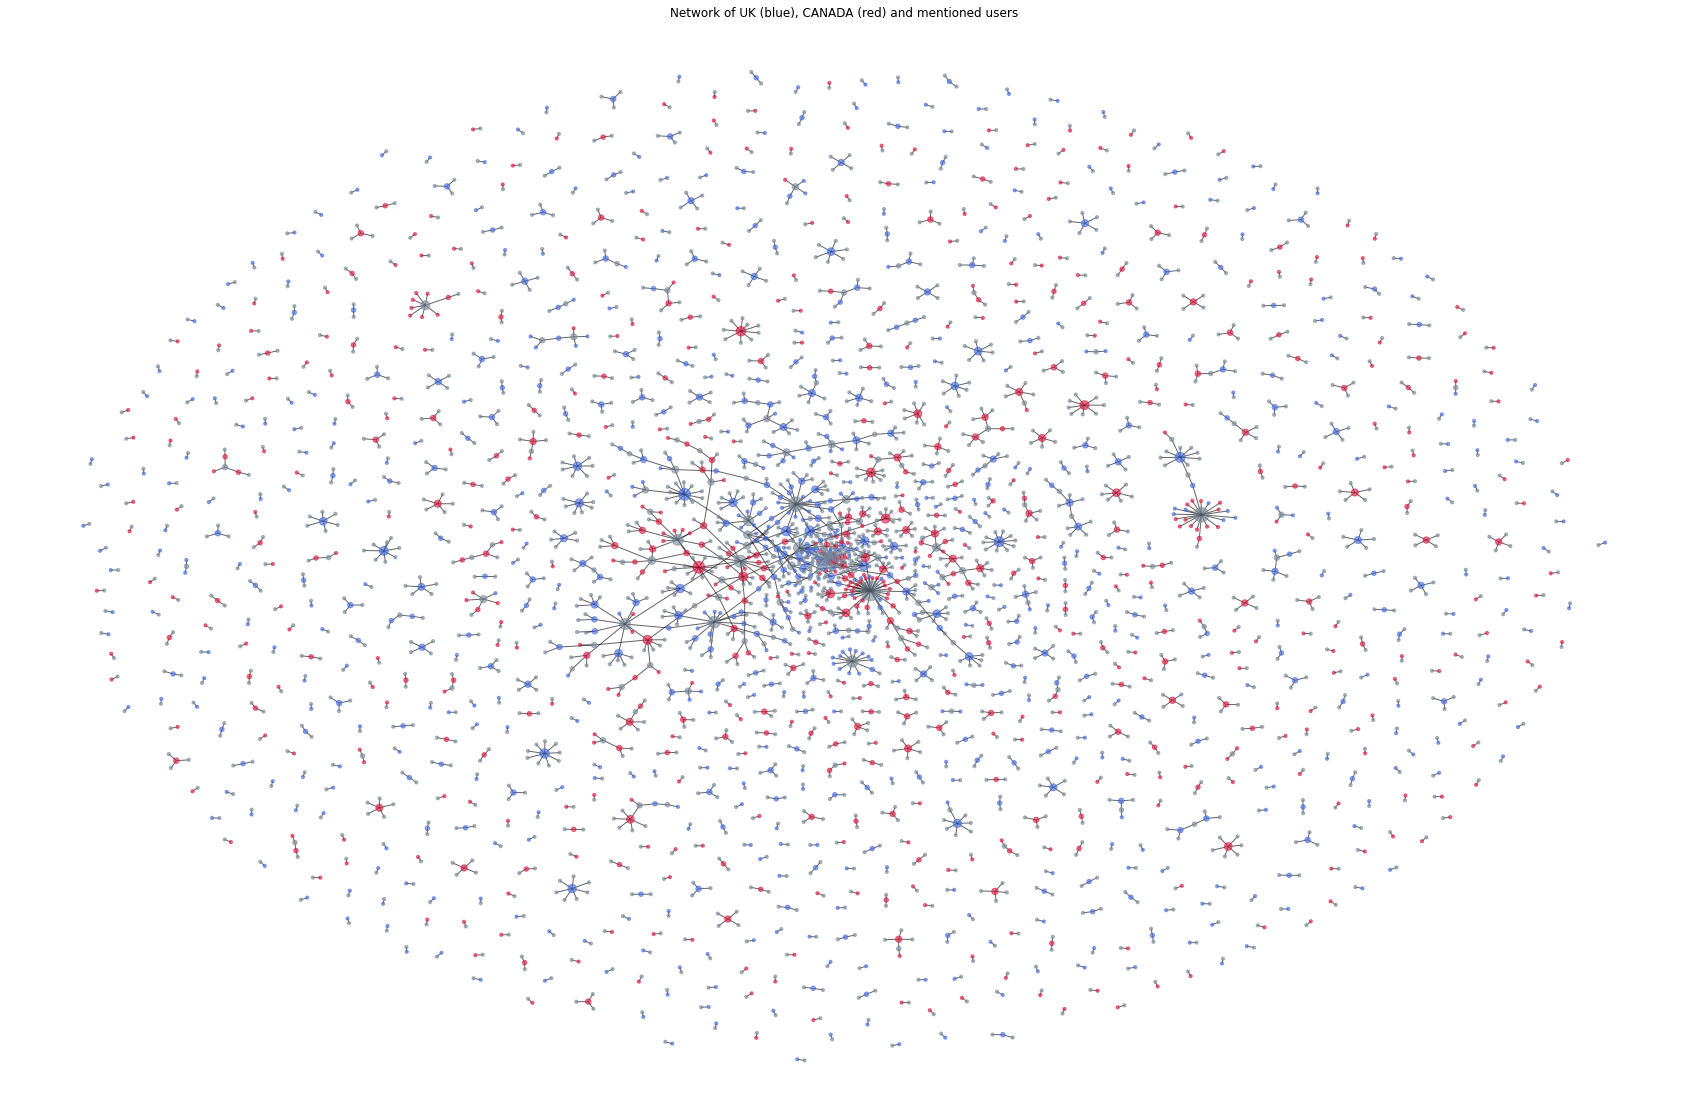

In [187]:
plt.figure(figsize = (30,20))

forceatlas2 = ForceAtlas2(
                        ## Behavior alternatives ##
                        outboundAttractionDistribution=False, # Dissuation
                        linLogMode=False,
                        adjustSizes=False, 
                        edgeWeightInfluence=1.0,

                        ## Performance ##
                        jitterTolerance=1.0,  # Tolerance level
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,

                        ## Tuning ##
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        ## Logging ##
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(g, pos=None, iterations=2000)

nx.draw_networkx(g, positions,nodelist=degree_dict.keys(), node_size=[v * 10 for v in degree_dict.values()], node_color = color_map_nodes,alpha = 0.6, edge_color = color_map_edge,with_labels=False)

plt.axis('off')
plt.title('Network of UK (blue), CANADA (red) and mentioned users')
plt.show()

In [188]:
# Get in-degrees in dict
degree_dict = dict(gcc_subgraph.degree)

## Node color map ##
color_map_nodes = []

for node in tqdm(list(gcc_subgraph.nodes())):
    
    if nx.get_node_attributes(gcc_subgraph,'country')[node] == 'can':
        color_map_nodes.append("#DC143C")
        
    elif nx.get_node_attributes(gcc_subgraph,'country')[node] == 'uk': # UK
        color_map_nodes.append("#4169E1")
    else:
        color_map_nodes.append("lightslategray")

## Edge color map ##
color_map_edge = []

# For UK-UK, CAN-CAN, UK-CAN, outside dataset respectively
color_a,color_b,color_c, color_d = '#87CEFA', '#FFB6C1'  ,'black', "gold"

for i in tqdm(list(gcc_subgraph.edges())):
    
    if nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] != nx.get_node_attributes(gcc_subgraph, 'country')[i[1]]:
        color_map_edge.append(color_c)
        
    elif nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] == 'uk':
        color_map_edge.append(color_a)
    
    elif nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] == 'can':
        color_map_edge.append(color_b)
        
    else:
        color_map_edge.append(color_d)

100%|██████████| 442/442 [00:00<00:00, 3325.43it/s]


100%|██████████| 2000/2000 [00:03<00:00, 549.71it/s]


BarnesHut Approximation  took  0.72  seconds
Repulsion forces  took  2.49  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.18  seconds


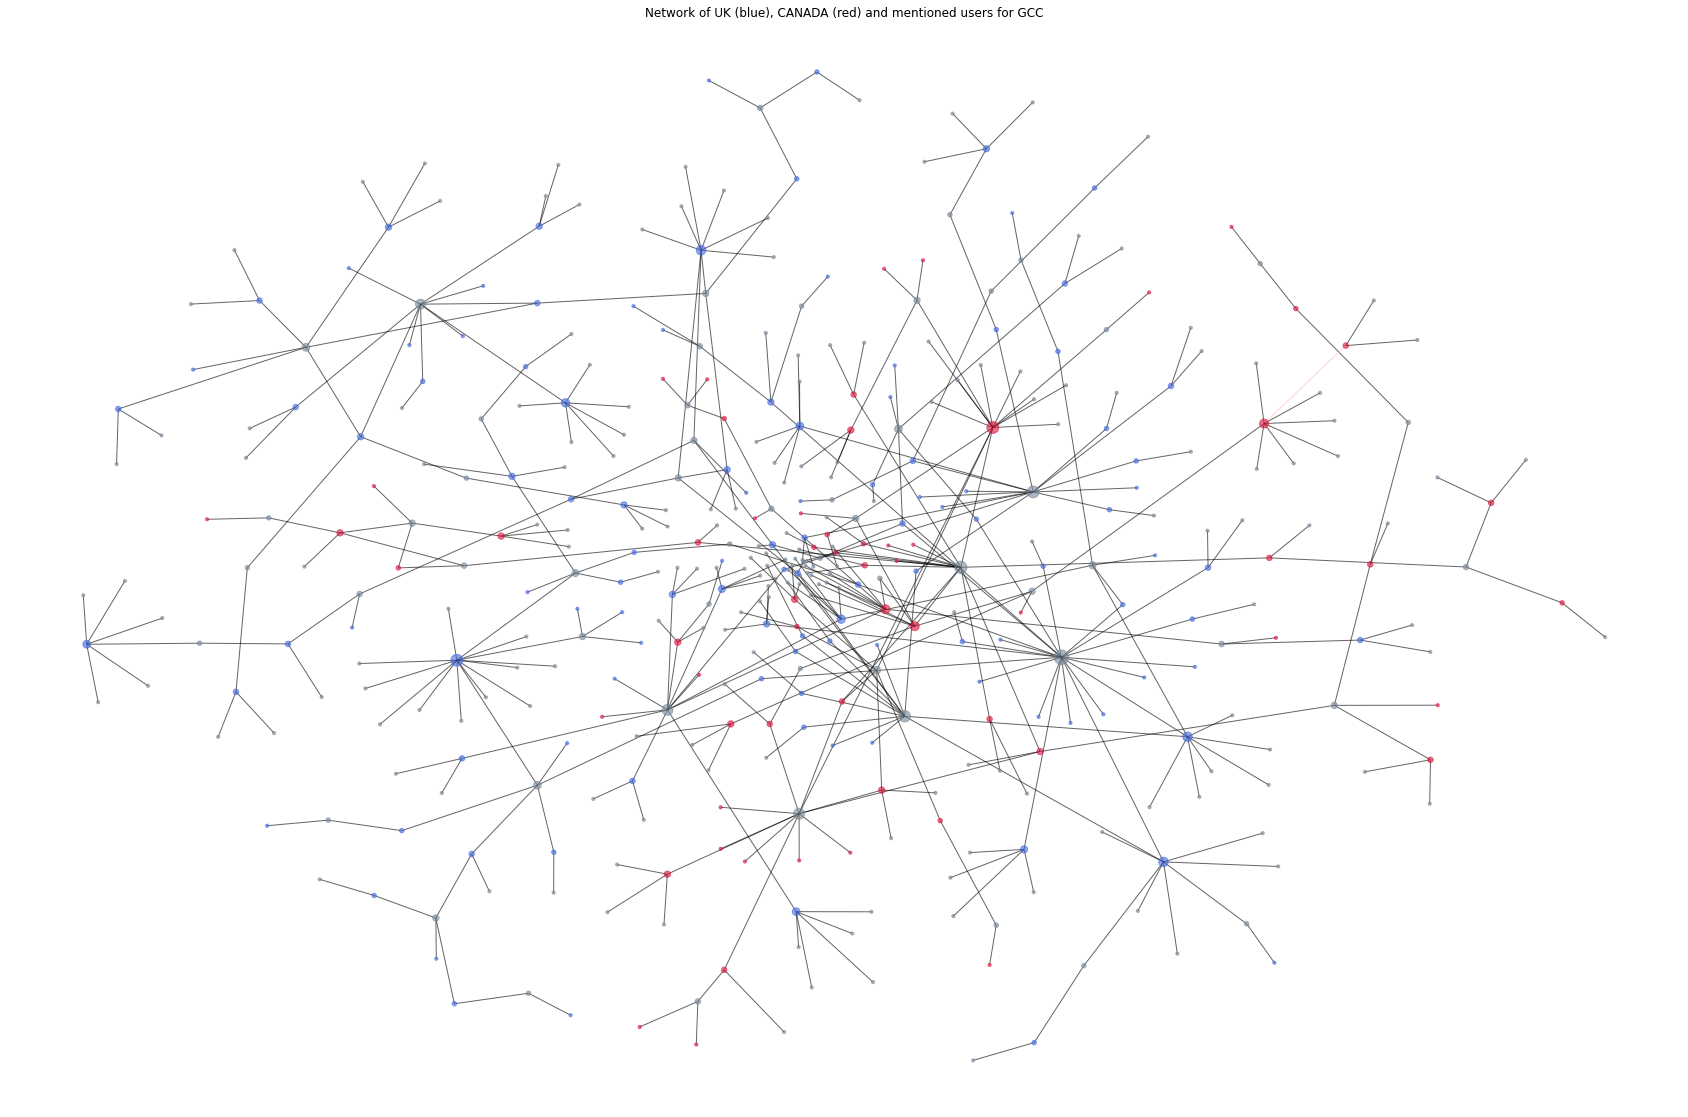

In [189]:
plt.figure(figsize = (30,20))

forceatlas2 = ForceAtlas2(
                        ## Behavior alternatives ##
                        outboundAttractionDistribution=False, # Dissuation
                        linLogMode=False,
                        adjustSizes=False, 
                        edgeWeightInfluence=1.0,

                        ## Performance ##
                        jitterTolerance=1.0,  # Tolerance level
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,

                        ## Tuning ##
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        ## Logging ##
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(gcc_subgraph, pos=None, iterations=2000)

nx.draw_networkx(gcc_subgraph, positions,nodelist=degree_dict.keys(), node_size=[v * 10 for v in degree_dict.values()], node_color = color_map_nodes,alpha = 0.6, edge_color = color_map_edge,with_labels=False)

plt.axis('off')
plt.title('Network of UK (blue), CANADA (red) and mentioned users for GCC')
plt.show()

In [199]:
## Most connected users
in_deg_dict = dict(G.in_degree(g.nodes))
print("Top most in-degree connected user: ,", sorted(in_deg_dict, key=in_deg_dict.get, reverse=True)[:1])

out_deg_dict = dict(G.out_degree(g.nodes))
print("Top most out-degree connected user: ,", sorted(out_deg_dict, key=out_deg_dict.get, reverse=True)[:1])

Top most in-degree connected user: , ['realDonaldTrump']
Top most out-degree connected user: , ['thematthorton']


**Check in/out-degree:**

In [201]:
# In-degrees
tuples_in_deg = G.in_degree(G.nodes())
in_deg = [x[1] for x in tuples_in_deg] 

# Out-degrees
tuples_out_deg = G.out_degree(G.nodes())
out_deg = [x[1] for x in tuples_out_deg] 

print('In degree\tmax: {}\tmin: {}\tmedian: {}'.format(max(in_deg),min(in_deg), np.median(in_deg)))
print('Out degree\tmax: {}\tmin: {}\tmedian: {}'.format(max(out_deg),min(out_deg),np.median(out_deg)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_deg if i >5])))

In degree	max: 39	min: 0	median: 1.0
Out degree	max: 14	min: 0	median: 0.0
Nodes with in-degree larger than 100: 16


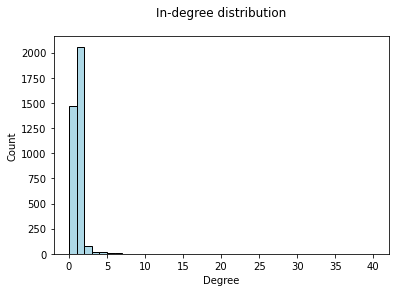

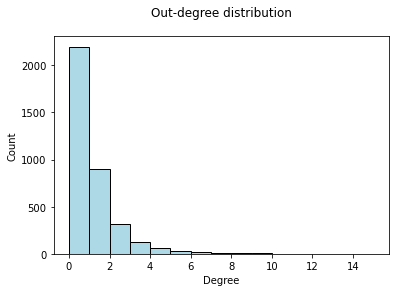

In [202]:
## Plot degree distributions
plt.title("In-degree distribution",pad = 20.0)
plt.hist(in_deg, bins = np.arange(np.min(in_deg), np.max(in_deg)+2), color = 'lightblue', edgecolor = 'black')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

plt.title("Out-degree distribution",pad = 20.0)
plt.hist(out_deg, bins = np.arange(np.min(out_deg), np.max(out_deg)+2), color = 'lightblue', edgecolor = 'black')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()